In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv('/Users/zakg04/Documents/HBC_lab/BOOST/Main/TaskLogic/data/test/test-7005/processed/DSST/7005_DSST_A.csv')
#subtract is number of rows that are not test
df = df[df['condition'] == 'test']
df


,Symbol,acc_sum,block_c,block_dur,clicked_response,condition,continue_roi_ticked,correct,correct_response,countdown,...,starttime,subject_id,task,task_vers,time_test_box_response,time_test_clicked_response,time_test_display_stimuli,trial,x_continue_box,y_continue_box
10,T,1,1,3.464,2,test,yes,1,2,116536.000013,...,140547.3,7005,DSST,A,142010.0,142718.0,139270.0,1,160,113
11,-,2,1,5.936,1,test,yes,1,1,114064.000130,...,144008.5,7005,DSST,A,144298.0,145189.0,142732.0,2,160,113
12,),3,1,8.225,3,test,yes,1,3,111775.000095,...,146478.2,7005,DSST,A,146934.0,147477.0,145201.0,3,160,113
13,^,4,1,11.447,7,test,yes,1,7,108552.999973,...,148767.4,7005,DSST,A,150162.0,150700.0,147490.0,4,160,113
14,T,5,1,13.817,2,test,yes,1,2,106183.000088,...,151992.5,7005,DSST,A,152362.0,153071.0,150716.0,5,160,113
15,L,6,1,15.921,4,test,yes,1,4,104078.999996,...,154360.1,7005,DSST,A,154595.0,155175.0,153083.0,6,160,113
16,X,7,1,18.394,8,test,yes,1,8,101606.000185,...,156463.6,7005,DSST,A,157053.0,157646.0,155187.0,7,160,113
17,T,8,1,22.869,2,test,yes,1,2,97131.000042,...,158936.0,7005,DSST,A,161265.0,162122.0,157659.0,8,160,113
18,-,9,1,25.559,1,test,yes,1,1,94440.999985,...,163412.5,7005,DSST,A,164103.0,164812.0,162135.0,9,160,113
19,),10,1,28.261,3,test,yes,1,3,91739.000082,...,166103.4,7005,DSST,A,166707.0,167516.0,164826.0,10,160,113


In [6]:
total = (df['acc_sum'].max() + 1)
total

39

In [20]:
total_correct = df['correct'].sum()
total_correct


48

In [22]:
#subtract the countdown between each cell and the prior cell to get the time spent on each cell
avg_time = []
for i in range(len(df)):
    if i == 0:
        avg_time.append(120000 - df['countdown'][i+10])
    else:
        avg_time.append(df['countdown'][i+9] - df['countdown'][i+10])
avg_time

[3463.9999866485596,
 2471.9998836517334,
 2289.000034332261,
 3222.000122070327,
 2369.999885559082,
 2104.0000915527344,
 2472.9998111724854,
 4475.000143051133,
 2690.000057220488,
 2701.9999027251906,
 2173.000097274795,
 2122.999906539917,
 2020.9999084472656,
 2269.0000534057617,
 2358.9999675750732,
 2186.000108718872,
 3241.999864578247,
 2022.0000743865967,
 1868.0000305175781,
 2072.000026702881,
 2836.9998931884766,
 2319.000005722046,
 2187.000036239624,
 2049.000024795532,
 2546.0000038146973,
 3187.000036239624,
 2289.0000343322754,
 2055.999994277954,
 2350.9998321533203,
 2523.0000019073486,
 2325.000047683723,
 2335.9999656677173,
 1957.0000171661377,
 2920.0000762939453,
 3628.000020980835,
 2615.999937057495,
 1988.0001544952393,
 2221.999883651737,
 2265.000104904171,
 2312.999963760376,
 2940.999984741211,
 3451.9999027252197,
 2851.999998092653,
 2187.000036239624,
 2559.999942779539,
 2084.0001106262207,
 2210.9999656677246,
 2112.99991607666,
 121.00005149841309

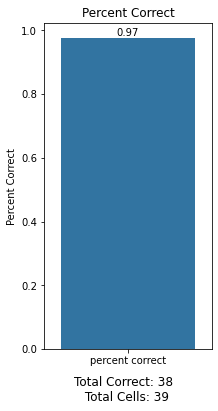

In [9]:
#plot percent correct by dividing total correct by total
percent_correct = total_correct/total
percent_correct

plt.figure(figsize=(3, 6))
#barplot of percent correct scale 0-1, show percent correct on top of bar
sns.barplot(x=['percent correct'], y=[percent_correct])
plt.text(0, percent_correct + 0.01, str(round(percent_correct, 2)), color='black', ha="center")
plt.ylabel('Percent Correct')
plt.title('Percent Correct')
cap_text = 'Total Correct: ' +str(total_correct) + ' \n Total Cells: ' + str(total)
plt.figtext(0.5, 0.01, cap_text, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


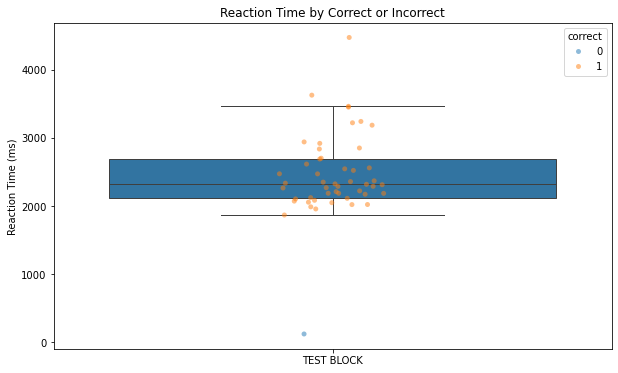

In [29]:
#create a scatterplot of reaction time with transparent box and whisker. Use transparent dots to show density and demarcate by correct or incorrect
new_df = pd.DataFrame({'reaction_time': avg_time, 'correct': df['correct']})
new_df['TEST BLOCK'] = 'TEST BLOCK'  # Add a constant column for the x-axis

plt.figure(figsize=(10, 6))
sns.boxplot(x='TEST BLOCK', y='reaction_time', data=new_df, showfliers=False)
sns.stripplot(x='TEST BLOCK', y='reaction_time', data=new_df, jitter=True, alpha=0.5, hue='correct')
plt.xlabel('')  # Remove the x-axis label
plt.ylabel('Reaction Time (ms)')
plt.title('Reaction Time by Correct or Incorrect')
plt.show()
